In [1]:
#***Steps****
#removing all columns which coantains only NULL records
#indentifying columns which are not useful and remove it 
#identiying if a column has only one single value
#removing outlier

#find out a way to identify all the defaulters and vice-versa

In [2]:
import pandas as pd

In [50]:
pd.options.display.max_rows = 5000
pd.options.display.max_columns =  500

In [83]:
df = pd.read_csv('F:\\Upgrad\\Lending Club Case Study\\loan.csv',low_memory=False)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [84]:
#removing all the columns which contains only NULL values
df_1 = df.dropna(axis=1, how='all').copy()

In [85]:
df_1.shape

(39717, 57)

In [86]:
df_1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [87]:
df_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [88]:
df_1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [89]:
#these applicant are defaulted and being charged Off
df_1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [90]:
#checking columns data types
df_1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [13]:
df_2.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [91]:
#identifying columns which is not useful OR having single/unique values 
columns_to_drop = [col for col in df_1.columns if df_1[col].nunique() == 1]
#df_1.drop(columns=columns_to_drop, inplace=True)
#url,desc,
columns_to_drop

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [92]:
df_1.drop(columns=columns_to_drop, inplace=True)

In [93]:
df_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,F

In [94]:
df_1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [95]:
# droping columns which is not useful for analysis
columns_to_drop=['id', 'member_id', 'url', 'desc', 'purpose','title','emp_title','zip_code']
df_1.drop(columns=columns_to_drop, inplace=True)

In [96]:
df_1.shape

(39717, 40)

In [97]:
df_1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [98]:
#data transform / data standardization
#finding outliers
df_1.int_rate = df_1.int_rate.apply(lambda x: x.replace('%', '')).astype(float)

In [99]:
df_1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [100]:
df_1.revol_util = df_1.revol_util.astype(str).apply(lambda x:x.replace('%','')).astype(str)
df_1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [170]:
# Changing Employee length to float
def checkEmpLen(x,col):
    print(x)
    if('<' in x):
        return 0
    elif('+' in x):
        return x.split('+')[0]
    elif(' ' in x):
        return x.split(' ')[0]
    else:
        return x

df_1.emp_length = df_1.emp_length.astype(str).apply(lambda x:x.replace('%','')).astype(str)
df_1['emp_length']= df_1['emp_length'].apply(checkEmpLen, args=('emp_length',))
df_1

TypeError: argument of type 'int' is not iterable

In [102]:
df_1.term = df_1.term.astype(str).apply(lambda x:x.replace(' months','')).astype(str)
df_1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Jul-07,Fully Paid,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [103]:
df_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [115]:
#finding out a pattern for charged Off customers
df_charged_off = df_1[df_1['loan_status'] == 'Charged Off'].copy()
df_charged_off

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60,13,0.0,0.0,646.02,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Dec-11,Charged Off,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,10.08,0,Apr-04,1,NaN,NaN,4,0,10452,91.70,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.00,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,7.06,0,May-91,2,NaN,NaN,14,0,11997,55.50,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.00,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,2500,675.0,36,12.80,84.00,D,D4,0,MORTGAGE,32000.0,Not Verified,Aug-07,Charged Off,NE,20.00,0,Jul-92,1,0.0,0.0,11,0,3408,35.10,32,0.0,0.0,2220.61,599.28,1706.01,477.21,1.69,35.70,0.3800,Mar-10,1.76,NaN,May-16,NaN
39668,2500,2500,825.0,36,9.64,80.26,B,B4,0,MORTGAGE,75000.0,Not Verified,Aug-07,Charged Off,NE,20.00,0,Feb-94,3,0.0,0.0,9,0,269,3.80,35,0.0,0.0,2086.63,688.35,1730.83,354.44,1.36,0.00,0.0000,Mar-10,1.40,NaN,May-16,NaN
39669,6500,6500,225.0,36,15.01,225.37,F,F1,9,MORTGAGE,213000.0,Not Verified,Aug-07,Charged Off,GA,6.45,0,Jul-90,0,0.0,0.0,11,0,56411,75.30,28,0.0,0.0,4054.35,139.42,2886.21,1168.14,0.00,0.00,0.0000,Feb-09,225.37,NaN,May-16,NaN
39678,1000,1000,950.0,36,10.59,32.55,C,C2,2,MORTGAGE,33990.0,Not Verified,Aug-07,Charged Off,VA,14.47,0,Jul-04,1,0.0,0.0,9,0,4485,36.90,11,0.0,0.0,703.95,668.87,544.02,138.64,0.00,21.29,0.2300,May-09,32.55,NaN,Oct-09,NaN


In [116]:
df_charged_off.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60,13,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Dec-11,Charged Off,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,10.08,0,Apr-04,1,NaN,NaN,4,0,10452,91.70,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,7.06,0,May-91,2,NaN,NaN,14,0,11997,55.50,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0


In [117]:
df_charged_off.shape

(5627, 40)

<Figure size 800x600 with 0 Axes>

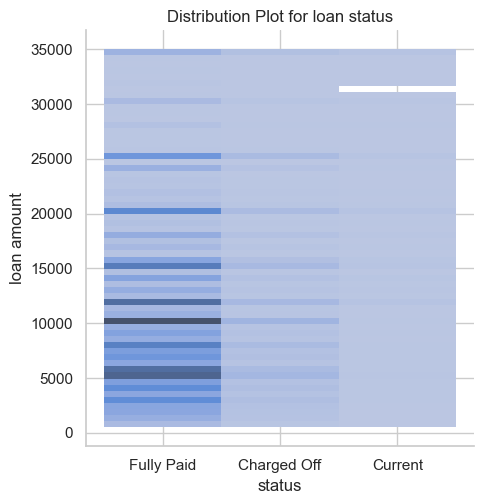

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for 'Column1'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the style of the plot
sns.displot(data=df_1, x='loan_status',y='loan_amnt')  # Create the distribution plot with KDE
plt.title('Distribution Plot for loan status')  # Set the plot title
plt.xlabel('status')  # x-axis label
plt.ylabel('loan amount')  # y-axis label
plt.show()  # Display the plot

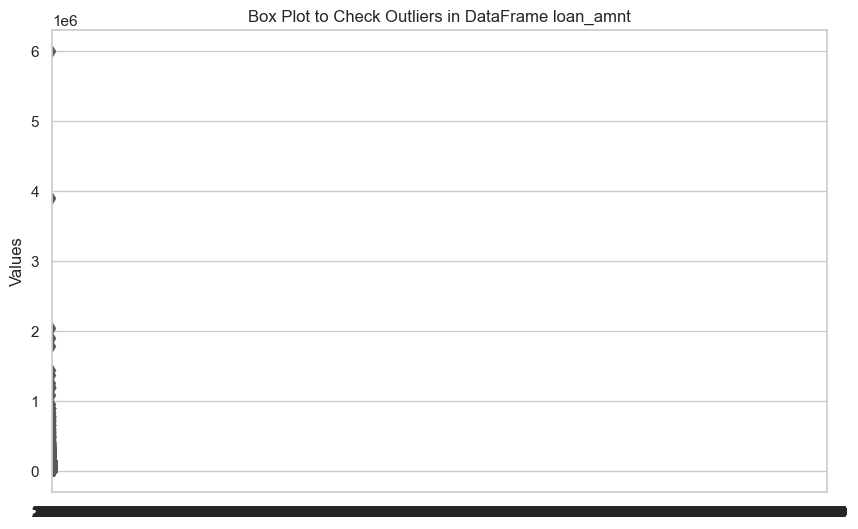

In [169]:
# Create box plots for each column to check for outliers
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=df_1, orient='v', palette='Set2')  # 'orient' specifies vertical orientation, 'palette' sets color scheme
plt.title('Box Plot to Check Outliers in DataFrame loan_amnt')
plt.ylabel('Values')  # y-axis label
plt.xticks(range(len(df.loan_amnt)), df.loan_amnt)  # x-axis labels
plt.show()

In [125]:
df_charged_off['loan_amnt'].dtype

dtype('int64')

In [131]:
upper_bound = df_charged_off['loan_amnt'].quantile(0.75)
lower_bound= df_charged_off['loan_amnt'].quantile(0.2)
IQR = upper_bound - lower_bound 
lower_bound = lower_bound - 1.5 * IQR
upper_bound = upper_bound + 1.5 * IQR

# Remove outliers and create a new DataFrame without outliers
filtered_df_middle = df_charged_off[(df['loan_amnt'] >= lower_bound) & (df_charged_off['loan_amnt'] <= upper_bound)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\2235659212.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_middle = df_charged_off[(df['loan_amnt'] >= lower_bound) & (df_charged_off['loan_amnt'] <= upper_bound)]


In [132]:
filtered_df_middle

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60,13,0.0,0.0,646.02,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Dec-11,Charged Off,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,10.08,0,Apr-04,1,NaN,NaN,4,0,10452,91.70,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.00,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,7.06,0,May-91,2,NaN,NaN,14,0,11997,55.50,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.00,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,2500,675.0,36,12.80,84.00,D,D4,0,MORTGAGE,32000.0,Not Verified,Aug-07,Charged Off,NE,20.00,0,Jul-92,1,0.0,0.0,11,0,3408,35.10,32,0.0,0.0,2220.61,599.28,1706.01,477.21,1.69,35.70,0.3800,Mar-10,1.76,NaN,May-16,NaN
39668,2500,2500,825.0,36,9.64,80.26,B,B4,0,MORTGAGE,75000.0,Not Verified,Aug-07,Charged Off,NE,20.00,0,Feb-94,3,0.0,0.0,9,0,269,3.80,35,0.0,0.0,2086.63,688.35,1730.83,354.44,1.36,0.00,0.0000,Mar-10,1.40,NaN,May-16,NaN
39669,6500,6500,225.0,36,15.01,225.37,F,F1,9,MORTGAGE,213000.0,Not Verified,Aug-07,Charged Off,GA,6.45,0,Jul-90,0,0.0,0.0,11,0,56411,75.30,28,0.0,0.0,4054.35,139.42,2886.21,1168.14,0.00,0.00,0.0000,Feb-09,225.37,NaN,May-16,NaN
39678,1000,1000,950.0,36,10.59,32.55,C,C2,2,MORTGAGE,33990.0,Not Verified,Aug-07,Charged Off,VA,14.47,0,Jul-04,1,0.0,0.0,9,0,4485,36.90,11,0.0,0.0,703.95,668.87,544.02,138.64,0.00,21.29,0.2300,May-09,32.55,NaN,Oct-09,NaN


<Figure size 800x600 with 0 Axes>

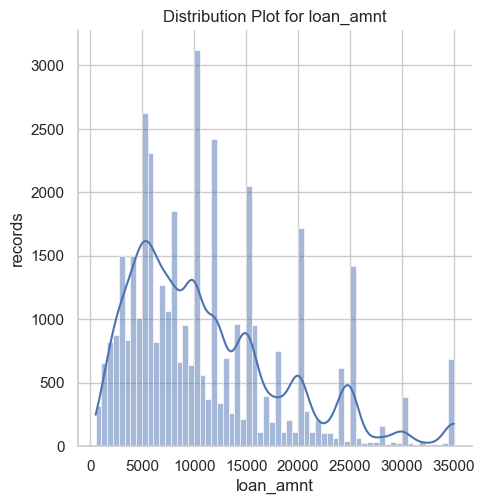

In [151]:
# Create a distribution plot for 'Column1'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the style of the plot
sns.displot(data=df_1, x='loan_amnt', kde=True)  # Create the distribution plot with KDE
plt.title('Distribution Plot for loan_amnt')  # Set the plot title
plt.xlabel('loan_amnt')  # x-axis label
plt.ylabel('records')  # y-axis label
plt.show()  # Display the plot

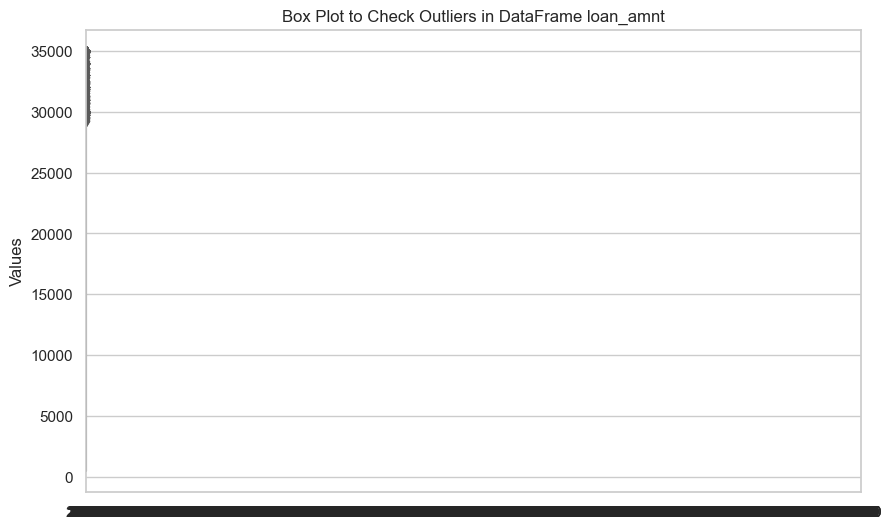

In [152]:
# Create box plots for each column to check for outliers
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=df_1.loan_amnt, orient='v', palette='Set2')  # 'orient' specifies vertical orientation, 'palette' sets color scheme
plt.title('Box Plot to Check Outliers in DataFrame loan_amnt')
plt.ylabel('Values')  # y-axis label
plt.xticks(range(len(filtered_df_middle.loan_amnt)), filtered_df_middle.loan_amnt)  # x-axis labels
plt.show()

<Axes: title={'center': 'total_pymnt'}, xlabel='loan_status'>

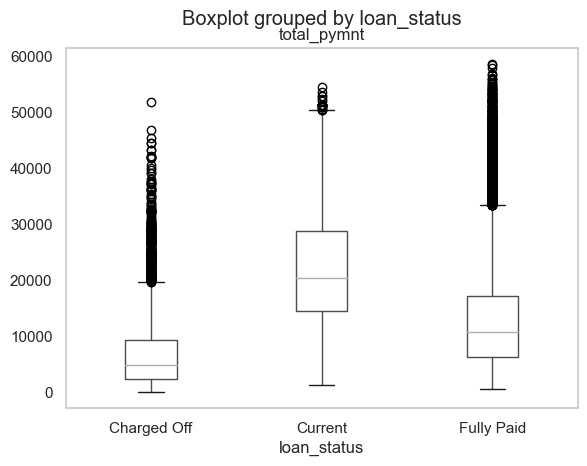

In [160]:
df_1.boxplot(by ='loan_status', column =['total_pymnt'], grid = False) 

In [162]:
sns.boxplot(data=df_1, x='loan_status',y='emp_length')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [157]:
corr = df_1.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\2540535545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_1.corr(method='pearson')


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,0.014871,0.004968,0.177168,-0.051236,0.317597,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,0.016359,-0.006059,0.175530,-0.052169,0.310392,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.071924,0.437906,0.163027,-0.053214,0.290797,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
int_rate,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,-0.055613,0.330691,0.010395,0.097208,0.097100,-0.043570,0.134616,0.134668,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,0.082550
installment,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,0.000047,-0.062171,0.172812,-0.046532,0.312679,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,-0.008822,-0.031866,0.158200,-0.018689,0.279961,0.235771,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.068815,0.187175,0.288045,-0.004621,0.228743,0.229881,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,-0.569438,-0.036628,0.011656,0.007463,-0.055125,0.067892,-0.003008,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,0.001405,0.008091,1.000000,-0.003851,-0.027878,0.091713,0.024802,-0.022381,0.111499,-0.012106,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346
mths_since_last_delinq,0.014871,0.016359,0.071924,-0.055613,0.000047,-0.008822,0.068815,-0.569438,-0.003851,1.000000,0.484749,0.024366,0.059105,0.013645,0.007643,0.005345,0.005501,0.012174,0.057515,0.015708,0.002801,-0.028460,-0.008622,-0.018697,0.007023,0.025841


C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\2620530335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation = df_1.corr()


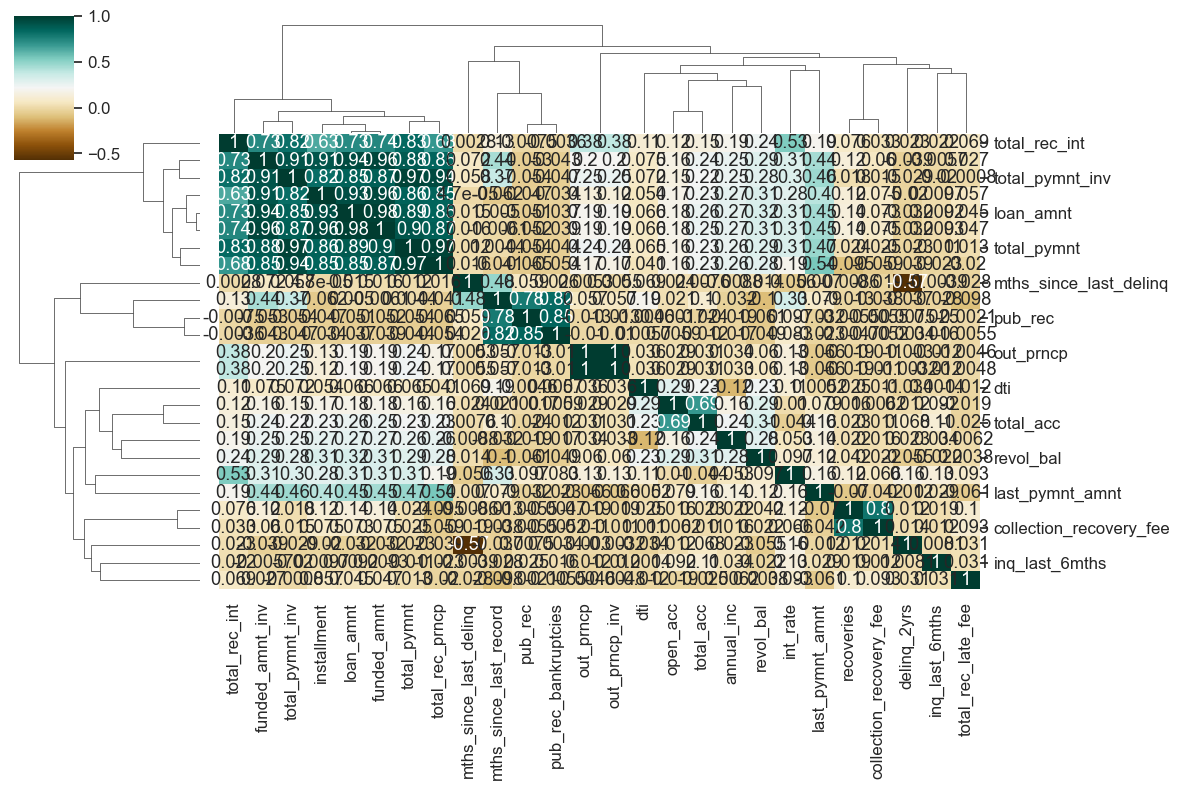

In [161]:
loan_correlation = df_1.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()